# 3 image method test with 3 image 1D FFT

## Packages

In [1]:
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
import glob
import sys
import os

#os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant')

from scipy.interpolate import interpolate
from scipy.interpolate import RectBivariateSpline
from scipy.interpolate import griddata
from scipy.interpolate import RegularGridInterpolator

from spectral_analysis_functions import *
from spectral_analysis_functions_3img import *
# Using OceanDataLab reader 
#from sentinel2_l1c import *
import numpy as np
from S2_read import *
from s2_angs import *



plt.rcParams.update({'font.size': 18,'savefig.facecolor':'white'})

/home/acuevas/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Image reading

In [2]:
XML_File = find('MTD_TL.xml', S2path)
XML_File_DS=find('MTD_DS.xml',S2path)
if XML_File is None:
    print("Le fichier 'MTD_TL.xml' n'a pas été trouvé dans le répertoire spécifié:", S2path)
#else:
 #   (tile_id, AngleObs, AngleSun) = get_angleobs(XML_File)
#    print('Reading XML file for view and sun angles:', XML_File)
    
#boxi1=[4400,5200,3600,4400] # East West South North : this box is covered by another detector
# boxi1=[6800,7600,7000,7800] # East West South North : this box is covered by another detector
# [imgs1,NX1,NY1,nx1,ny1,dx1,dy1,offspec1,phitrig1,thetav1,loncenter1,latcenter1,detector,indexX,indexY]=S2_read(S2path,boxi1,bands)
#boxi=[5600,6400,3600,4400] # East West South North 
# boxi=[9000, 10000, 7000, 11000] # East West South North modif

[imgs,NX,NY,nx,ny,dx,dy,offspec,phitrig,thetav,loncenter,latcenter,detector,indexX,indexY]=S2_read(S2path,boxi,bands)


NameError: name 'S2path' is not defined

In [44]:
# %run Visualisation_image.ipynb
# print(boxi)

In [3]:
print('lon,lat:',np.degrees(loncenter),np.degrees(latcenter))

nb=np.shape(bands)[0]


array1=np.squeeze(detector[1,:,:])
fig, ax = plt.subplots() 
im=ax.pcolor(indexX,indexY,array1)
fig.colorbar(im)
ax.set_title('detector index and FFT box location')
ax.set_xlabel('pixel index')
ax.set_ylabel('pixel index')
ax.axis('equal')
rect = mp.patches.Rectangle((boxi[0], boxi[2]), boxi[1]-boxi[0], boxi[3]-boxi[2], linewidth=2,
                         edgecolor='k', facecolor="none")
# rect1 = mp.patches.Rectangle((boxi1[0], boxi1[2]), boxi1[1]-boxi1[0], boxi1[3]-boxi1[2], linewidth=2,
#                          edgecolor='r', facecolor="none")
# ax.add_patch(rect1)

ax.add_patch(rect)
plt.show()

NameError: name 'loncenter' is not defined

In [ ]:
# Conversion radian degree en gardant les float

loncenter=loncenter*180/(math.pi)
latcenter=latcenter*180/(math.pi)

## Calculation of dt

#### Identifying the detector

In [4]:
# On determine le centre de la boîte en pixel
def centre_carre(x0,xy0,taille_boite):
    centrex=x0+taille_boite/2
    centrey=y0+taille_boite/2
    return centrex, centrey

x0=boxi[0]
y0=boxi[2]
cote=boxi[1]-boxi[0]
centre=centre_carre(x0,y0,cote)
centre = (int(centre[0]), int(centre[1]))
print('centre',centre)

centre (2900, 6400)


In [6]:
# print('indexX',indexX)
indexX2, indexY2 = np.meshgrid(indexX, indexY)
print('shape indexX',np.shape(indexX))
print('shape indexY',np.shape(indexY))
print('shape array1',np.shape(array1))


# Aplatir les grilles et les valeurs pour utiliser dans griddata
points = np.column_stack((indexX.ravel(), indexY.ravel()))
values = array1.ravel()

# Interpolation
value = griddata(points, values, centre, method='linear')
value = value.item()  # Extraire la valeur si c'est un tableau 1D avec un seul élément
print(value)

shape indexX (23, 23)
shape indexY (23, 23)
shape array1 (23, 23)
2.0


In [7]:
mapping = {
    1: 'D01',
    2: 'D02',
    3: 'D03',
    4: 'D04',
    5: 'D05',
    6: 'D06',
    7: 'D07',
    8: 'D08',
    9: 'D09',
    10: 'D10',
    11: 'D11',
    12: 'D12'
}
if round(value) in mapping:
    Det = mapping[round(value)]
else:
    # Si la valeur arrondie n'est pas dans le dictionnaire, attribuez une valeur par défaut ou gérez l'erreur selon votre cas d'utilisation
    Det = "Valeur non trouvée"
print(Det)

detector_find=int(value)

D02


In [8]:
datastrip_dir = os.path.join(S2path, "DATASTRIP")

# Liste des éléments dans le répertoire DATASTRIP
datastrip_contents = os.listdir(datastrip_dir)

# Filtrer les répertoires dans datastrip_contents
directories = [item for item in datastrip_contents if os.path.isdir(os.path.join(datastrip_dir, item))]

# Vérifier qu'il y a exactement un répertoire dans DATASTRIP
if len(directories) == 1:
    # Si un seul répertoire est présent, construire le chemin vers MTD_DS.xml
    xml_path = os.path.join(datastrip_dir, directories[0], "MTD_DS.xml")
    print(xml_path)
else:
    print("Il n'y a pas exactement un seul répertoire dans DATASTRIP.")

/home/acuevas/Bureau/S2_ALEXANDRA/27_04_2023/S2B_MSIL1C_20230427T185919_N0509_R013_T10SBF_20230427T223909.SAFE/DATASTRIP/DS_2BPS_20230427T223909_S20230427T190624/MTD_DS.xml


In [9]:
dt1=!python main_computeDT.py -lon {loncenter} -lat {latcenter} -src B2 -dst B4 -det {Det} -sat {Sat} -eph {xml_path}
print('dt1=',dt1[0])

dt2=!python main_computeDT.py -lon {loncenter} -lat {latcenter} -src B2 -dst B3 -det {Det} -sat {Sat} -eph {xml_path}
print('dt2=',dt2[0])

dt3=!python main_computeDT.py -lon {loncenter} -lat {latcenter} -src B3 -dst B4 -det {Det} -sat {Sat} -eph {xml_path}
print('dt3=',dt3[0])


dt1= -1.0104237560859402
dt2= -0.5249077604213463
dt3= -0.4855250270975148


### FFT 3 images B04 B03 B02

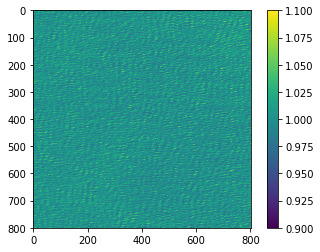

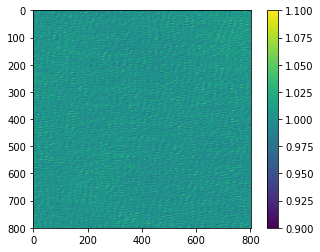

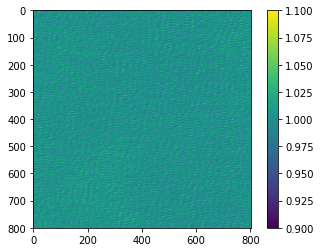

In [10]:
# normalizes the image values
img1=imgs[0,:,:]/np.median(imgs[0,:,:].flatten()) #B4
img2=imgs[2,:,:]/np.median(imgs[2,:,:].flatten()) #B3
img3=imgs[3,:,:]/np.median(imgs[3,:,:].flatten()) #B2


# tb4=5.7
# tb3=5.2
# tb2=4.7
tb4=0
tb3 = tb4 + float(dt3[0])
tb2 = tb4 + float(dt1[0])  

imgtimes = np.array([tb4, tb3, tb2])

# imgtimes=np.array([tb4,tb3,tb2])
# print(imgtimes)
# print(f"imgtimes: {imgtimes}, type: {type(imgtimes)}, dtype: {imgtimes.dtype}")

plt.imshow(np.flipud(np.transpose(img1)),vmin=0.9, vmax=1.1) #edit your vmin, vmax and cmap if you don't like greyscale colormap
plt.colorbar()
plt.show()

plt.imshow(np.flipud(np.transpose(img2)),vmin=0.9, vmax=1.1) #edit your vmin, vmax and cmap if you don't like greyscale colormap
plt.colorbar()
plt.show()

plt.imshow(np.flipud(np.transpose(img3)),vmin=0.9, vmax=1.1) #edit your vmin, vmax and cmap if you don't like greyscale colormap
plt.colorbar()
plt.show()

# Fourier transform with 3 images and Least-square

Not sure that is working well...

In [11]:
Umin=-5
Umax=5
ntile=8

std1=np.nanstd(img1.flatten())
std2=np.nanstd(img2.flatten())
std3=np.nanstd(img3.flatten())

mean1=np.nanmean(img1.flatten())
mean2=np.nanmean(img2.flatten())
mean3=np.nanmean(img3.flatten())


(E1, E2, E3, U, Uvar, Uall, EA, EB, nU, coh12, coh23, coh31, ang12, ang23, ang31, kxs, kys, angstd, phases, eps2s) = FFT2D3((img1-mean1)/std1, (img2-mean2)/std2, (img3-mean3)/std3, imgtimes, nx, ny, dx, dy, ntile, Umin, Umax)

nx 801 8 100
ny 801 8 100
npixel 10000


/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/spectral_analysis_functions_3img.py:435: RuntimeWarning: invalid value encountered in divide
  EA /= nU
/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/spectral_analysis_functions_3img.py:436: RuntimeWarning: invalid value encountered in divide
  EB /= nU


In [12]:
nkx=len(kxs)
nky=len(kys)

kxs2 = np.tile(kxs[:, np.newaxis], (1, nky))
kys2 = np.tile(kys[np.newaxis, :], (nkx, 1))
dir2a=np.degrees(np.arctan2(kxs2,kys2))

print(np.shape(E1))
print(np.shape(kxs))
print(np.shape(kys))
print('U med',np.shape(U))
phiblind1=phitrig[0]+90.  # blind azimuth for first band
phiblind2=phitrig[1]+90.  # blind azimuth for 3rd band
phiblind3=phitrig[2]+90.  # blind azimuth for 3rd band
kN=50
xkblind=[-1.4*kN*np.sin(np.radians(phiblind2)) , 1.4*kN*np.sin(np.radians(phiblind2))]
ykblind=[-1.4*kN*np.cos(np.radians(phiblind2)) , 1.4*kN*np.cos(np.radians(phiblind2))]

X = np.arange(0,nx*dx,dx) # from 0 to (nx-1)*dx with a dx step
Y = np.arange(0,ny*dy,dy)


(100, 100)
(100,)
(100,)
U med (100, 100)


### Plot  figures from the fourier transform

variance 1: 0.0006282475465123842 sum of spectrum: 1.010941724435349
variance 2: 0.00040058657997038343 sum of spectrum: 1.0105627439789042
variance 3: 0.0002577217171188648 sum of spectrum: 1.0066894433336617


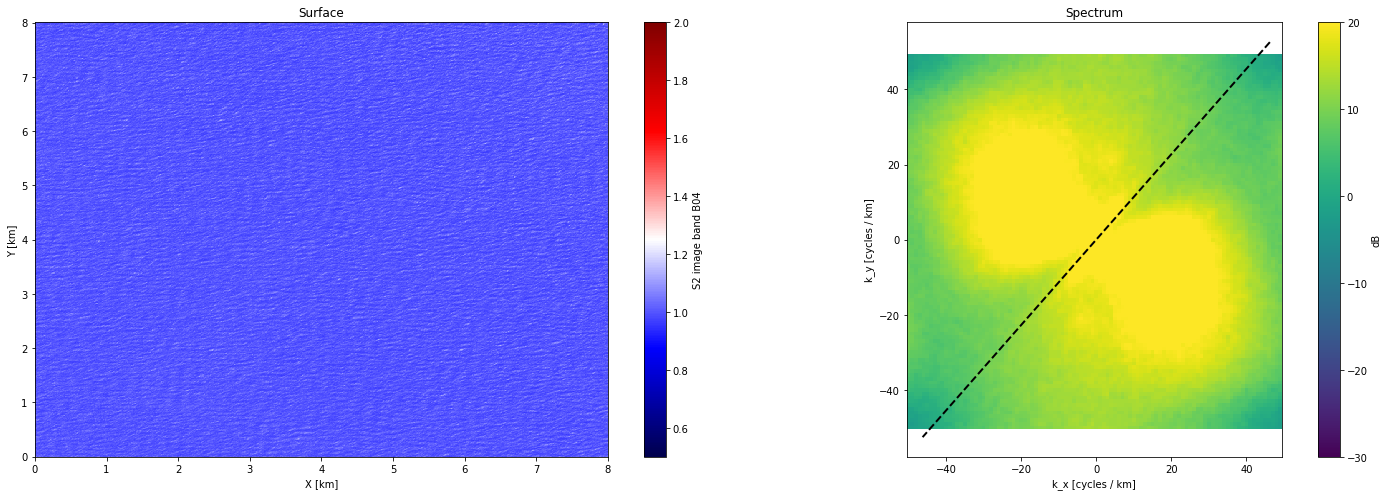

In [13]:
fig,axs=plt.subplots(1,2,figsize=(20,7))#,sharey=True,sharex=True)
_=plt.gca().set_aspect('equal', adjustable='box')

# warning: we use an array img1 that is written with X in the first (number 0) dimension and Y in the second
#          but pcolormesh uses the opposite order: hence the use of transpose 

im=axs[0].pcolormesh(X/1000,Y/1000,np.transpose(img2),cmap='seismic',norm = mcolors.Normalize(vmin=0.5, vmax=2))
_=plt.colorbar(im,ax=axs[0],label='S2 image band B04')
_=axs[0].set_xlabel('X [km]')
_=axs[0].set_ylabel('Y [km]')
_=axs[0].set_title('Surface')

im=axs[1].pcolormesh(kxs2*1000,kys2*1000,10*np.log10((E2)),norm = mcolors.Normalize(vmin=-10, vmax=40))
_=plt.colorbar(im,ax=axs[1],label='dB')
_=plt.plot(xkblind,ykblind,color='k',linestyle='--',linewidth=2)
_=axs[1].set_xlabel('k_x [cycles / km]')
_=axs[1].set_ylabel('k_y [cycles / km]')
_=axs[1].set_title('Spectrum')
_=plt.tight_layout()

dkx=kxs[1]-kxs[0]
dky=kys[1]-kys[0]
print('variance 1:',np.var(img1.flatten()), 'sum of spectrum:',np.sum(E1.flatten())*dkx*dky )
print('variance 2:',np.var(img2.flatten()), 'sum of spectrum:',np.sum(E2.flatten())*dkx*dky )
print('variance 3:',np.var(img3.flatten()), 'sum of spectrum:',np.sum(E3.flatten())*dkx*dky )


NameError: name 'kxs' is not defined

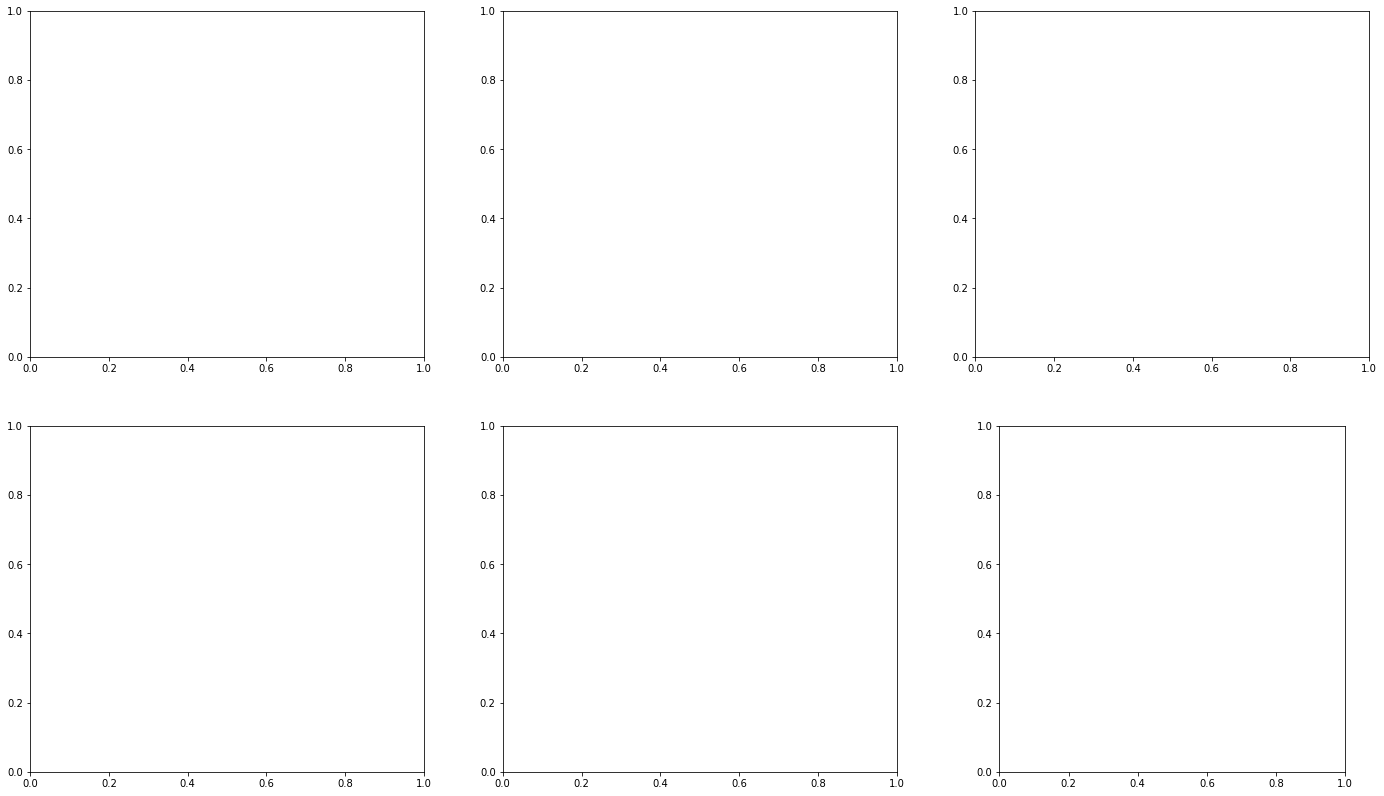

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(24, 14))#,sharey=True,sharex=True)
plt.gca().set_aspect('equal', adjustable='box')

# Plot coherence between img1 and img2
im = axs[0, 0].pcolormesh(kxs2*1000, kys2*1000, coh12, norm=mcolors.Normalize(vmin=0, vmax=1))
plt.colorbar(im, ax=axs[0, 0], label=' ')
axs[0, 0].plot(xkblind, ykblind, color='k', linestyle='--', linewidth=2)
axs[0, 0].set_xlabel('k_x [cycles / km]')
axs[0, 0].set_ylabel('k_y [cycles / km]')
axs[0, 0].set_title('Coherence B4-B3')

# Plot coherence between img1 and img3
im = axs[0, 1].pcolormesh(kxs2*1000, kys2*1000, coh31, norm=mcolors.Normalize(vmin=0, vmax=1))
plt.colorbar(im, ax=axs[0, 1], label=' ')
axs[0, 1].plot(xkblind, ykblind, color='k', linestyle='--', linewidth=2)
axs[0, 1].set_xlabel('k_x [cycles / km]')
axs[0, 1].set_ylabel('k_y [cycles / km]')
axs[0, 1].set_title('Coherence B4-B2')

# Plot coherence between img2 and img3
im = axs[0, 2].pcolormesh(kxs2*1000, kys2*1000, coh23, norm=mcolors.Normalize(vmin=0, vmax=1))
plt.colorbar(im, ax=axs[0, 2], label=' ')
axs[0, 2].plot(xkblind, ykblind, color='k', linestyle='--', linewidth=2)
axs[0, 2].set_xlabel('k_x [cycles / km]')
axs[0, 2].set_ylabel('k_y [cycles / km]')
axs[0, 2].set_title('Coherence B3-B2')

# Plot phase cross-spectrum between img1 and img2
im = axs[1, 0].pcolormesh(kxs2*1000, kys2*1000, np.degrees(ang12), cmap='seismic', norm=mcolors.Normalize(vmin=-180, vmax=180))
plt.colorbar(im, ax=axs[1, 0], label='degrees')
axs[1, 0].plot(xkblind, ykblind, color='k', linestyle='--', linewidth=2)
axs[1, 0].set_xlabel('k_x [cycles / km]')
axs[1, 0].set_ylabel('k_y [cycles / km]')
axs[1, 0].set_title('Cross-spectrum phase B4-B3')

# Plot phase cross-spectrum between img1 and img3
im = axs[1, 1].pcolormesh(kxs2*1000, kys2*1000, nU, cmap='seismic', norm=mcolors.Normalize(vmin=-180, vmax=180))
plt.colorbar(im, ax=axs[1, 1], label='degrees')
axs[1, 1].plot(xkblind, ykblind, color='k', linestyle='--', linewidth=2)
axs[1, 1].set_xlabel('k_x [cycles / km]')
axs[1, 1].set_ylabel('k_y [cycles / km]')
axs[1, 1].set_title('Cross-spectrum phase B4-B2')

# Plot phase cross-spectrum between img2 and img3
#im = axs[1, 2].pcolormesh(kxs2*1000, kys2*1000, np.degrees(ang23), cmap='seismic', norm=mcolors.Normalize(vmin=-180, vmax=180))
im = axs[1, 2].pcolormesh(kxs2*1000, kys2*1000, np.sqrt(Uvar), cmap='seismic')
plt.colorbar(im, ax=axs[1, 2], label='m/s')
axs[1, 2].plot(xkblind, ykblind, color='k', linestyle='--', linewidth=2)
axs[1, 2].set_xlabel('k_x [cycles / km]')
axs[1, 2].set_ylabel('k_y [cycles / km]')
axs[1, 2].set_title('std (U)')

plt.tight_layout()


## Analyze phase speed and presence of reflection in sequence of 3 images

In [11]:
dirC1=-50
dirC2=-40  # bonds for angular sector (for making simple plot) 

# print('dir2a',dir2a)
# print('min dir2a',min(dir2a))
# print('max dir2a',max(dir2a))

curmax=1.5 # for plots



kn=np.sqrt(kxs2**2+kys2**2)*(2*np.pi)+1E-20
kncpk=kn/(2*np.pi)*1000
dt=imgtimes[2]-imgtimes[0] # Pour l'instant on fait comme ça

# print('angstd',np.degrees(angstd)<60)
# indices = np.where(np.degrees(angstd) < 60)
# print('Indices où angles_degrees < 60:', indices)

Je=np.where(eps2s > 0)
ebin=eps2s*0+1
ebin[Je]=0
ebin2=eps2s*0
ebin2[Je]=eps2s[Je]
ep = np.sqrt(np.median(ebin + ebin2, axis=2))
J =np.where((coh31 > 0.01) & (dir2a < dirC2) & (dir2a > dirC1) & (np.degrees(angstd)  < 60) )
J2=np.where((coh31 > 0.01) & (dir2a < dirC2) & (dir2a > dirC1) )
J3=np.where((dir2a < dirC2) & (dir2a > dirC1) & (ep<0.3))
J4=np.where(ep >0.3)
J5=np.where(coh31<0.64)
#J6=np.where((dir2a < dirC2) & (dir2a > dirC1) & (np.degrees(angstd)  < 60) & (kn > (2*pi)*15/1000) & (kn < (2*pi)*45/1000))
J6=np.where((dir2a < dirC2) & (dir2a > dirC1) & (ep<0.3) & (kn > (2*pi)*15/1000) & (kn < (2*pi)*45/1000))

NameError: name 'kxs' is not defined

In [ ]:
# comparison of U from 3 images and phase speed
dispt=np.sqrt(9.81/kn)
Cimg=ang31/kn/dt
Cstd=angstd/kn/abs(dt)

d2r=np.pi/180
# Calcul du courant suivant les deux composantes X et Y

UX=U*kxs2/kn
VY=U*kys2/kn


#En français
#plt.plot(kn[J6]/(2*pi)*1000,dispt[J6],'kx',linewidth=3,label='Théorie Airy') 
plt.plot(kn[J6]/(2*pi)*1000,Cimg[J6]-dispt[J6],'ro',linewidth=1,label='2 images')
plt.plot(kn[J6]/(2*pi)*1000,U[J6],'ko',linewidth=1,label='3 images')
#plt.plot(kn[J]/(2*pi)*1000,-Cimg[J],'bo',linewidth=1,label=' image X-spectra') 
plt.grid(True)
plt.xlabel('k (cycles / km)')
plt.ylabel('U (m/s)')
plt.legend()

In [ ]:
# comparison of U from 3 images and phase speed
dispt=np.sqrt(9.81/kn)
Cimg=ang31/kn/dt
Cstd=angstd/kn/abs(dt)

d2r=np.pi/180
# Calcul du courant suivant les deux composantes X et Y

UX=U*kxs2/kn
VY=U*kys2/kn


#En français
#plt.plot(kn[J6]/(2*pi)*1000,dispt[J6],'kx',linewidth=3,label='Théorie Airy') 
#plt.plot(kn[J6]/(2*pi)*1000,-Cimg[J6],'ro',linewidth=1,label='S2 phase')
#plt.plot(kn[J]/(2*pi)*1000,-Cimg[J],'bo',linewidth=1,label=' image X-spectra') 
#plt.grid(True)
#plt.xlabel('k (cycles / km)')
#plt.ylabel('Vitesse de phase (m/s)')
#plt.legend()

#En français
#plt.plot(kn[J6]/(2*pi)*1000,dispt[J6],'kx',linewidth=3,label='Théorie Airy') 
plt.plot(kn[J6]/(2*pi)*1000,Cimg[J6]-dispt[J6],'ro',linewidth=1,label='2 images')
plt.plot(kn[J6]/(2*pi)*1000,U[J6],'ko',linewidth=1,label='3 images')
#plt.plot(kn[J]/(2*pi)*1000,-Cimg[J],'bo',linewidth=1,label=' image X-spectra') 
plt.grid(True)
plt.xlabel('k (cycles / km)')
plt.ylabel('U (m/s)')
plt.legend()

In [10]:
Uguess=-1
Vguess=0
Clin=np.sqrt(9.81/kn)
philinp = np.mod(Clin * kn * dt + Uguess * kxs2 * dt + np.pi, 2 * np.pi) - np.pi
philinm = np.mod(-Clin * kn * dt + Uguess * kxs2 * dt + np.pi, 2 * np.pi) - np.pi
Cimg0=(ang31-philinm)/kn/dt;
Cimg2=(ang31-philinp)/kn/dt;
signchoice=np.where(abs(Cimg2) < abs(Cimg0));
Cimg0[signchoice]=Cimg2[signchoice];
Cimgp=Cimg0;
Cimgp[J5]=np.nan
Cstd=angstd/kn/abs(dt)

# Calcul du courant

CUR = (Cimgp - Clin * np.sign(ang31)).T
JJ = np.where(~np.isnan(CUR))[0]
mean_CUR = np.mean(CUR[JJ])

# print('CUR',CUR)
# print('mean CUR',mean_CUR)

print(U)
print(np.shape(U))

NameError: name 'kn' is not defined

In [1]:
# Calcul du courant suivant les deux composantes X et Y

UX=U*kxs2/kn
VY=U*kys2/kn

# print(np.shape(UX))
# print(np.shape(VY))
avg_UX=np.average(UX)
avg_VY=np.average(VY)

med_UX=np.median(UX)
med_VY=np.median(VY)

# print('Moyenne UX',avg_UX)
# print('Moyenne VY',avg_VY)

# print('Median UX',med_UX)
# print('Median VY',med_VY)

UX_flat=UX.flatten()
VY_flat=VY.flatten()

kxs_norm=(kxs2/kn).flatten()
kys_norm=(kys2/kn).flatten()

d2r=np.pi/180

# Moyenne sur une gamme de longueur d'onde
k_min_fit = 35 # in cpk
k_max_fit = 45 # in cpk
std_max=60*d2r
id_fit = np.where((angstd.flatten()  < std_max)  & (kncpk.flatten() >= k_min_fit) & (kncpk.flatten() <= k_max_fit) )[0]  # & phase > 0


UX_fit=UX_flat[id_fit]
VY_fit=VY_flat[id_fit]
Kx_fit=kxs_norm[id_fit]
Ky_fit=kys_norm[id_fit]

# Fonction pour calculer la moyenne en excluant les zéros
def moyenne_sans_zero(liste):
    # Filtrer les zéros
    liste_sans_zero = [x for x in liste if x != 0]
    
    # Vérifier si la liste n'est pas vide
    if not liste_sans_zero:
        return 0  # ou retourner None si vous préférez indiquer qu'il n'y a pas de moyenne

    # Calculer la moyenne
    moyenne = sum(liste_sans_zero) / len(liste_sans_zero)
    return moyenne


avg_Ufit=np.nanmean(UX_fit)
# avg_Ufit=moyenne_sans_zero(UX_fit)
med_Ufit=np.nanmedian(UX_fit)
avg_Vfit=np.nanmean(VY_fit)
# avg_Vfit=moyenne_sans_zero(VY_fit)
med_Vfit=np.nanmedian(VY_fit)

print('Moyenne UX',avg_Ufit)
print('Moyenne VY',avg_Vfit)

print('Median UX',med_Ufit)
print('Median VY',med_Vfit)

plt.plot(Kx_fit,UX_fit,'x')
plt.xlabel('kx rad/m')
plt.ylabel('U (m/s)')

NameError: name 'U' is not defined

### Plot 1
